# Titanic (Best result: 0.803, Rank 1319)

In [54]:
import sys
sys.path.insert(0, '../../Utilities') # https://github.com/LarsNeR/Utilities
from Utilities import *

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature exploration

### DataFrame

In [57]:
print(get_highly_correlating_columns(df_train, threshold=0.5))
print(get_sparsely_filled_columns(df_train, threshold=0.2))
print("Any na in Pclass: " + str(df_train['Pclass'].isna().any()))
print("Any na in Name: " + str(df_train['Name'].isna().any()))
print("Any na in Sex: " + str(df_train['Sex'].isna().any()))
print("Any na in Age: " + str(df_train['Age'].isna().any()))
print("Any na in SibSp: " + str(df_train['SibSp'].isna().any()))
print("Any na in Parch: " + str(df_train['Parch'].isna().any()))
print("Any na in Ticket: " + str(df_train['Ticket'].isna().any()))
print("Any na in Fare: " + str(df_train['Fare'].isna().any()))
print("Any na in Cabin: " + str(df_train['Cabin'].isna().any()))
print("Any na in Embarked: " + str(df_train['Embarked'].isna().any()))

[('Pclass', 'Fare', -0.549)]
Cabin    0.771044
dtype: float64
Any na in Pclass: False
Any na in Name: False
Any na in Sex: False
Any na in Age: True
Any na in SibSp: False
Any na in Parch: False
Any na in Ticket: False
Any na in Fare: False
Any na in Cabin: True
Any na in Embarked: True


### PassengerId

In [58]:
print(df_train['PassengerId'].values[:200])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


### Survived

Label

### Pclass

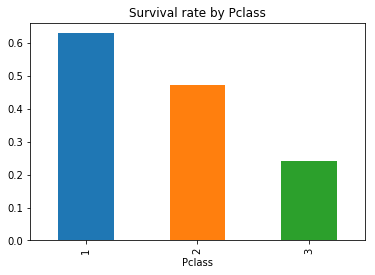

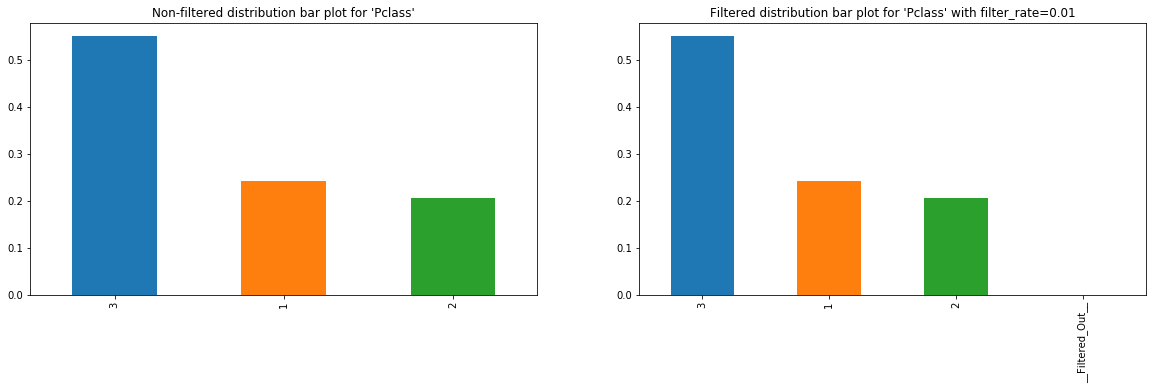

In [59]:
df_train.groupby('Pclass')['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by Pclass')
plt.show()
get_categorical_distrbution(df_train['Pclass'])

### Name

In [60]:
df_train.loc[:20, 'Name']

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

### Sex

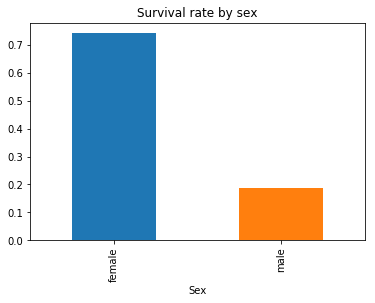

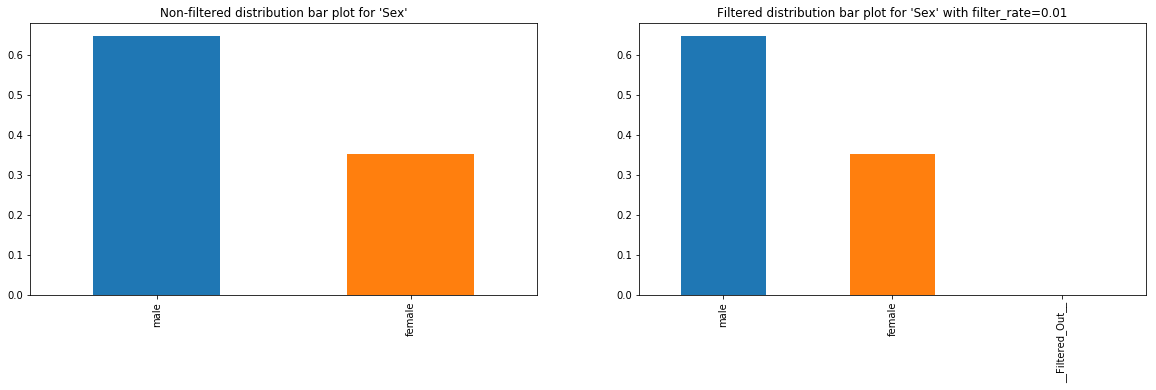

In [61]:
df_train.groupby('Sex')['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by sex')
plt.show()
get_categorical_distrbution(df_train['Sex'])

In [62]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

### Age

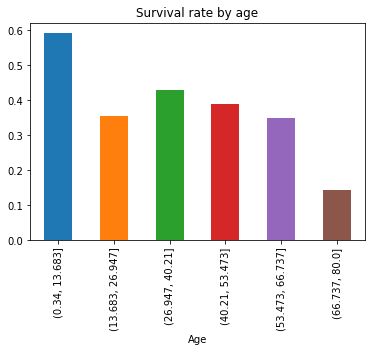

c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


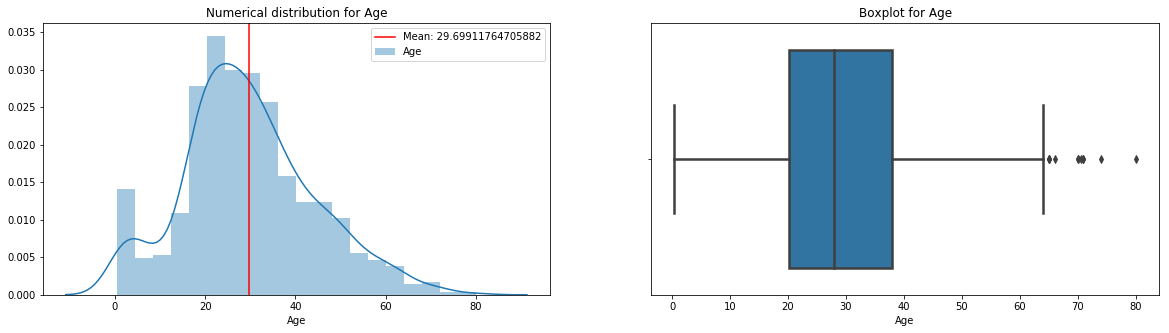

In [63]:
bins = pd.cut(df_train['Age'], 6)
df_train.groupby(bins)['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by age')
plt.show()
get_numerical_distrbution(df_train['Age'])

### SibSp

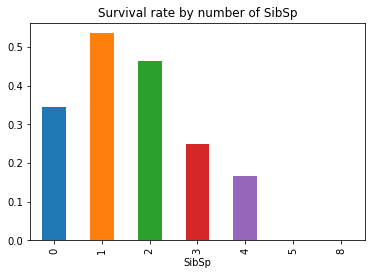

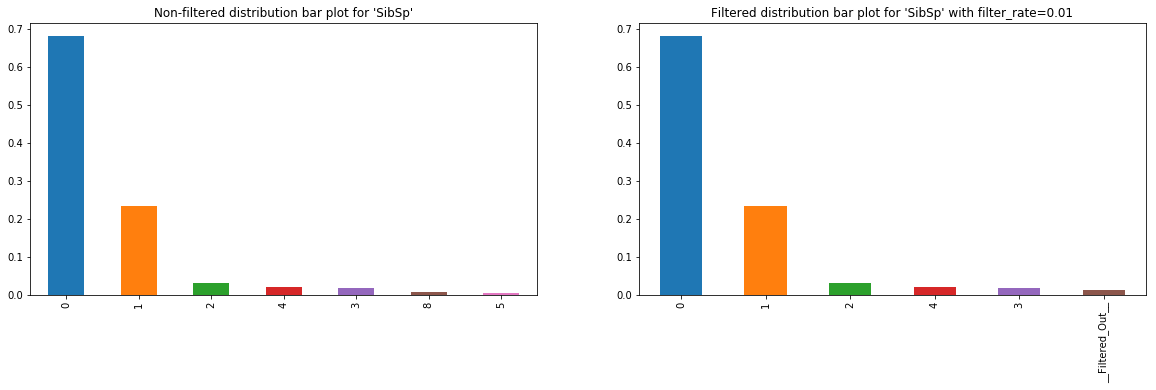

In [64]:
df_train.groupby('SibSp')['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by number of SibSp')
plt.show()
get_categorical_distrbution(df_train['SibSp'])

### Parch

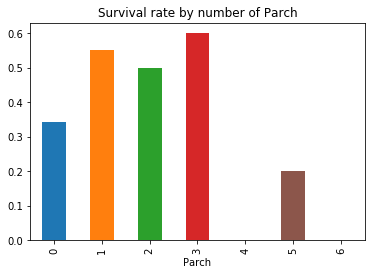

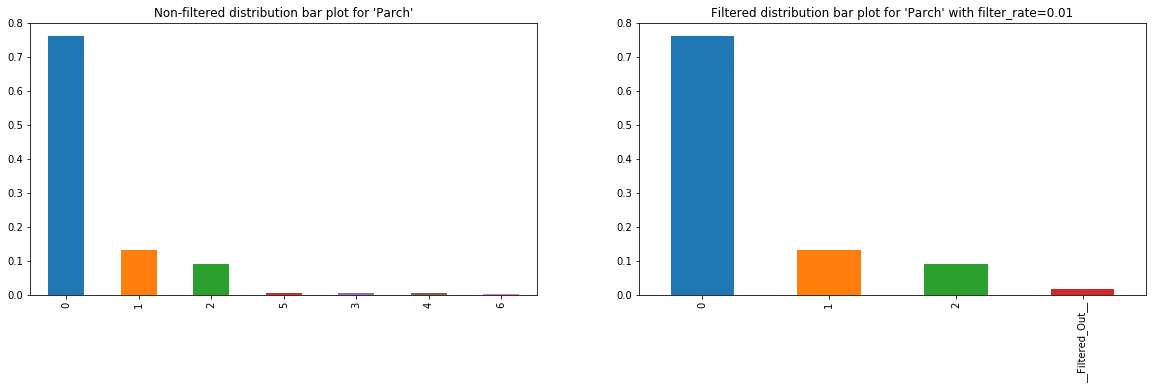

In [65]:
avg_by_Pclass = df_train.groupby('Parch')['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by number of Parch')
plt.show()
get_categorical_distrbution(df_train['Parch'])

### Ticket

In [66]:
df_train.loc[:20, 'Ticket']

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
Name: Ticket, dtype: object

### Fare

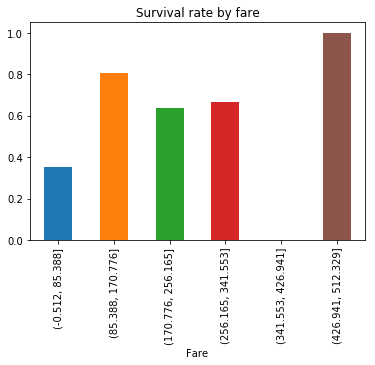

c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


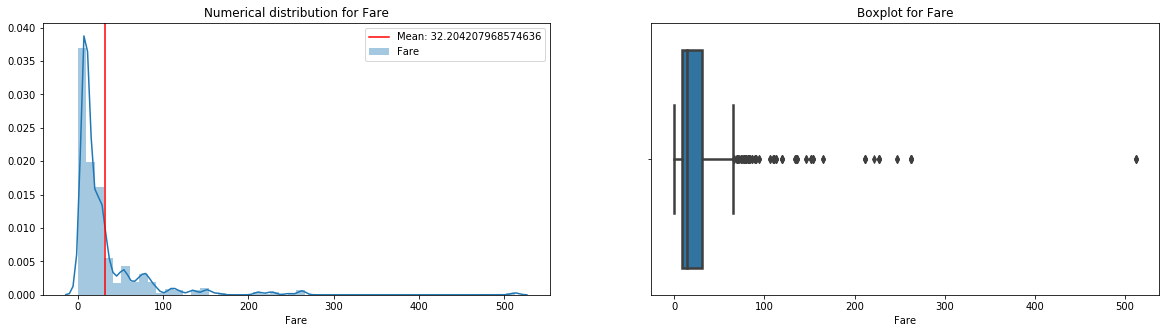

In [67]:
bins = pd.cut(df_train['Fare'], 6)
df_train.groupby(bins)['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by fare')
plt.show()
get_numerical_distrbution(df_train['Fare'])

### Cabin

In [68]:
df_train.loc[:20, 'Cabin']

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
Name: Cabin, dtype: object

### Embarked

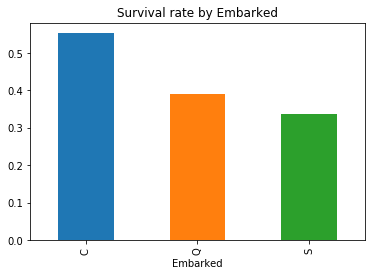

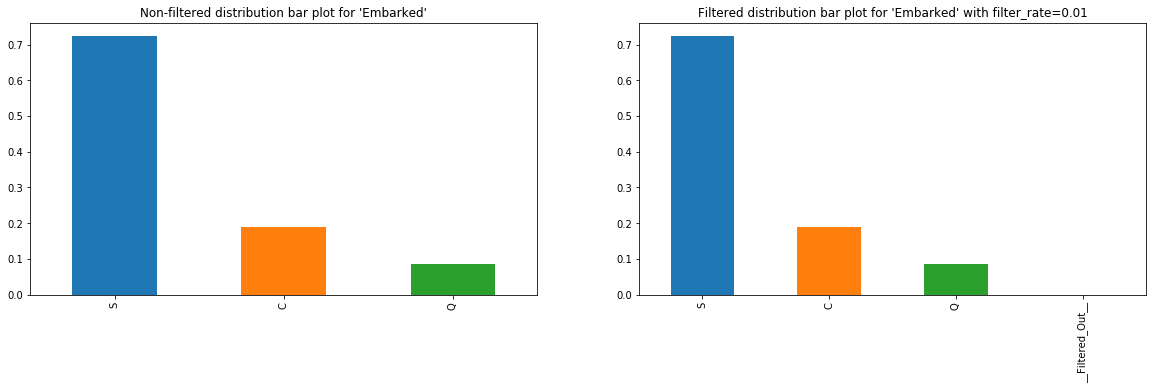

In [69]:
df_train.groupby('Embarked')['Survived'].agg(np.mean).plot(kind='bar', title='Survival rate by Embarked')
plt.show()
get_categorical_distrbution(df_train['Embarked'])

### Insights

- No highly correlating features
- Cabin has many NaNs (Age and Embarked have some)
- PassengerId is just an incrementing number. Only important for test set
- Passengers having a higher socio-economic status have a higher survival rate
- We could extract information about titles and family relations from names
- Sex feature is binary
- Having more male passengers, female passengers have survived more often than the male ones
- Survival rate depends on age. A good binning has to be found
- Estimation of age (xx.5) can be important, estimating with help of SibSp could be possible
- Number of SibSp has a small impact on the survival rate
- Number of Parch has a small impact on the survival rate. Imbalanced feature (over 75% have 0 Parch)
- Ticket seems to be an arbitrary Code. Maybe it correlates in any kind with the survival rate
- Survival rate depends on fare. A good binning has to be found
- Check if the cabin letter/number correlates in any way with the survival rate
- Survival rate slightly depends on Embarked

## Feature Generation

### PassengerId

Drop the column

In [70]:
def drop_passenger_id(df):
    return df.drop('PassengerId', axis=1, errors='ignore')

### Pclass

No changes

### Name

Only check if the passenger has a title

In [71]:
titles = "Master|Don|Rev|Dr"
def check_if_title(df):
    return df['Name'].str.contains(titles, regex=True)

### Sex

Convert it to 0 and 1

In [72]:
def get_converted_sex(df):
    return df['Sex'].astype('category').cat.codes

### Age

Fill NA with mean value

In [73]:
def fillna_age(df):
    return df['Age'].fillna(df['Age'].mean())

Bin it into 4 classes

In [74]:
def bin_age(df):
    return pd.cut(df['Age'], [0, 14, 25, 50, 100], labels=[1,2,3,4])

### SibSp

No changes

### Parch

No changes

### Ticket

No changes

### Fare

Fill NA with mean value

In [75]:
def fillna_fare(df):
    return df['Fare'].fillna(df['Fare'].mean())

Bin it into 4 classes

In [76]:
def bin_fare(df):
    return pd.cut(df['Fare'], [-1, 30, 100, 150, 1000], labels=[1,2,3,4])

### Cabin

Drop

In [77]:
def drop_cabin(df):
    return df.drop('Cabin', axis=1, errors='ignore')

### Embarked

One-Hot-Encode embarked

In [78]:
def one_hot_encode_embarked(df):
    df['EmbarkS'] = (df['Embarked'] == 'S').astype('category').cat.codes
    df['EmbarkC'] = (df['Embarked'] == 'C').astype('category').cat.codes
    df['EmbarkQ'] = (df['Embarked'] == 'Q').astype('category').cat.codes
    return df

### Add FamilySize

In [79]:
def get_family_size(df):
    return df['SibSp'] + df['Parch']

### Check if is alone(df):

In [80]:
def is_alone(df):
    df_size = df['SibSp'] + df['Parch']
    df_size = df_size == 0
    return df_size

### Preprocessing

Call all previous feature generation steps

In [81]:
def preprocess_df(df):
    df = drop_passenger_id(df)
    df['HasTitle'] = check_if_title(df)
    df['SexBinary'] = get_converted_sex(df)
    df['Age'] = fillna_age(df)
    df['AgeBin'] = bin_age(df)
    df['Fare'] = fillna_fare(df)
    df['FareBin'] = bin_fare(df)
    df = drop_cabin(df)
    df = one_hot_encode_embarked(df)
    df['FamilySize'] = get_family_size(df)
    df['IsAlone'] = is_alone(df)
    df = df.drop(df[['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked']].columns, axis=1, errors='ignore')
    return df

## Baseline

Checking if label is balanced

In [82]:
df_train['Survived'].value_counts()/df_train['Survived'].shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Not completely balanced. Will take F1-Measure as evaluation metric. (I know that Kaggle uses accuracy)

Baseline this time is if the classifier always predicts a random class.

In [83]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [84]:
y = df_train['Survived']
X = df_train.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
score = 0
for i in range(100):
    score += f1_score(y_test, np.random.randint(2, size=len(y_test)))
print("Baseline: " + str(score/100))

Baseline: 0.42134753295731714


Baseline is always around 42%.

## Training

In [85]:
df = preprocess_df(df_train)

In [86]:
y = df['Survived'].values
X = df.drop('Survived', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y)

### MLP

In [87]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
print("F1-Score: " + str(f1_score(y_test, y_pred)))

F1-Score: 0.7640449438202247


c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
print("F1-Score: " + str(f1_score(y_test, y_pred)))

F1-Score: 0.7486033519553074


c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Keras

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [37]:
def train_model(X_train, y_train, params, verbose=0):
    clf = Sequential()

    clf.add(Dense(units = X_train.shape[1]*2, activation='relu', input_dim = X_train.shape[1]))
    clf.add(Dropout(float(params['dropout'])))
    
    clf.add(Dense(units = int(X_train.shape[1]*1.5), activation='relu'))
    clf.add(Dropout(float(params['dropout'])))
    
    clf.add(Dense(units = 1, activation='sigmoid'))

    clf.compile(optimizer = params['optimizer'], loss = params['losses'], metrics=['accuracy'])

    history = clf.fit(X_train, y_train, epochs = int(params['epochs']), batch_size = int(params['batch_size']), verbose=verbose)
    return history, clf

In [38]:
p = {'batch_size': 10,
     'epochs': 150,
     'dropout': 0.01,
     'optimizer': 'rmsprop',
     'losses': 'binary_crossentropy'
    }
h, clf_nn = train_model(X_train, y_train, p, 0)
print(h)

In [39]:
y_pred = clf_nn.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print("F1-Score: " + str(f1_score(y_test, y_pred)))

F1-Score: 0.7500000000000001


### Predicting

#### Train all 3 models on whole dataset and then convert it to kaggle submission csv

In [40]:
df_test = pd.read_csv('./data/test.csv')
df_result = pd.DataFrame({'PassengerId': df_test['PassengerId']})
df = preprocess_df(df_test)
X_test = df.values

In [41]:
clf_mlp.fit(X, y)
df_result['Survived'] = clf_mlp.predict(X_test)
df_result.to_csv('./data/result_mlp.csv', index=False)

clf_lr.fit(X, y)
df_result['Survived'] = clf_lr.predict(X_test)
df_result.to_csv('./data/result_lr.csv', index=False)

clf_nn.fit(X, y)
y_pred_nn = clf_nn.predict(X_test)
y_pred_nn[y_pred_nn > 0.5] = 1
y_pred_nn[y_pred_nn <= 0.5] = 0
df_result['Survived'] = y_pred_nn
df_result['Survived'] = df_result['Survived'].astype(int)
df_result.to_csv('./data/result_nn.csv', index=False)

Epoch 1/1
891/891 [==============================] - 0s 53us/step - loss: 0.3796 - acc: 0.8462


c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Submitting them to Kaggle gave following results
- MLP: 0.803 (Rank 1319)
- Logistic Regression: 0.7751 (Rank 6055)
- NN: 0.7655 (Rank ?)

### Hyperparameter-Tuning

MLP gave best results so I'm trying to improve it with hyperparameter-tuning. First I tried a RandomizedSearchCV with various parameters. After that I used GridSearchCV with a limited number of flexible parameters.

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
df = preprocess_df(df_train)
parameters = {
    'hidden_layer_sizes':[(24, 48, 12), (48, 96, 96, 48)], 
    'activation':['tanh'], 
    'alpha': [0.001, 0.005, 0.01], 
    'learning_rate': ['adaptive']}
y = df['Survived'].values
X = df.drop('Survived', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters, cv=int(X_train.shape[0]/10), verbose=3, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
y_pred = clf.predict(X_test)
print("F1-Score: " + str(f1_score(y_test, y_pred)))

Fitting 66 folds for each of 6 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  8.1min finished
c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (24, 48, 12), 'learning_rate': 'adaptive'}
F1-Score: 0.7515923566878979


c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### This will take some time (more than 3 hours on my - quite slow - machine). Go make yourself a coffee - or two...

Best parameters:

{'solver': 'adam', 'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (24, 48, 12), 'alpha': 0.001, 'activation': 'tanh'}

F1-Score: 0.7901234567901235

## Final run of MLP with these parameters

In [53]:
from sklearn.neural_network import MLPClassifier
df_test = pd.read_csv('./data/test.csv')
df_result = pd.DataFrame({'PassengerId': df_test['PassengerId']})
df = preprocess_df(df_test)
X_test = df.values
clf_mlp = MLPClassifier(hidden_layer_sizes=(24, 48, 12), solver='adam', max_iter=200, learning_rate='adaptive', alpha=0.005, activation='tanh')
clf_mlp.fit(X, y)
df_result['Survived'] = clf_mlp.predict(X_test)
df_result.to_csv('./data/result_final.csv', index=False)

c:\users\lars\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Gives a result of 0.79904

Seems like the 0.803 was a lucky shot

## Notes/What can improve the model

- Give value to specific titles (Dr. is higher than Mr. e.g.)
- Extract family relations from names/SibSp/Parch
- Fill Ages NA with mean of title (Mr, Miss, Ms,...) or mean of SibSp
- Consider Age estimations
- Check if ticket (prefix) correlates with survival rate
- OneHotEncode Ages/Fares
- Use information from the test set to improve age mean, fare mean,...

## Final Python Code

You can find the final python code in src/Main.py